<h1>Importing Libraries</h1>

Please run "pip install -r requirements.txt" from the root of the project 

In [1]:
import os
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score
from sklearn.metrics import classification_report
# Get the top 10 columns and their values for each row along with row name (index)
import warnings

# Disable all FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

<h1>Titanic Dataset</h1>

https://www.kaggle.com/c/titanic/data

In [2]:

label_encoder = preprocessing.LabelEncoder()
current_directory = os.getcwd()
titanic = pd.read_csv(current_directory+'\\titanic.csv')

titanic["Cabin"].fillna("Not Known")
titanic["Embarked"].fillna("Not Known")
titanic["Sex"].fillna("Not Known")
titanic["Ticket"].fillna("Not Known")
titanic["Name"].fillna("Not Known")

titanic["Cabin"] = label_encoder.fit_transform(titanic["Cabin"])
titanic["Name"] = label_encoder.fit_transform(titanic["Name"])
titanic["Sex"] = label_encoder.fit_transform(titanic["Sex"])
titanic["Ticket"] = label_encoder.fit_transform(titanic["Ticket"])
titanic["Embarked"] = label_encoder.fit_transform(titanic["Embarked"])

titanic_labels = titanic["Survived"]
titanic = titanic.drop("Survived", axis=1)

In [3]:
train_size = 0.8
test_size = 1 - train_size
assert train_size + test_size == 1

titanic.drop("Name",axis=1, inplace=True)
titanic_train, titanic_test, labels_train, labels_test = train_test_split(titanic,titanic_labels , train_size=train_size, random_state=42)

In [4]:
'''
both ways are valid
we do fillna here instead of above as we want to avoid data leaking since an average would 
use all the data in the column before splitting
'''
titanic_train["Age"].fillna(titanic_train["Age"].mean(), inplace=True)

titanic_test["Age"] = titanic_test["Age"].fillna(titanic_train["Age"].mean())


<h1>Quick Sanity Check</h1>

In [5]:
titanic.loc[titanic["Age"].isna()==True]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,3,1,NaN,0,0,275,8.4583,147,1
17,18,2,1,NaN,0,0,151,13.0000,147,2
19,20,3,0,NaN,0,0,184,7.2250,147,0
26,27,3,1,NaN,0,0,179,7.2250,147,0
28,29,3,0,NaN,0,0,283,7.8792,147,1
...,...,...,...,...,...,...,...,...,...,...
859,860,3,1,NaN,0,0,178,7.2292,147,0
863,864,3,0,NaN,8,2,568,69.5500,147,2
868,869,3,1,NaN,0,0,309,9.5000,147,2
878,879,3,1,NaN,0,0,363,7.8958,147,2


In [6]:
titanic_train.loc[titanic_train["Age"].isna()==True]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [7]:
titanic_test.loc[titanic_test["Age"].isna()==True]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


<h2>2.2 Training and Test data split</h2>

In [8]:
def metrics(true_y,prediction_y):
    print(f"Accuracy: {accuracy_score(y_true=true_y,y_pred= prediction_y)}")
    print(f"Precision (Weighted): {precision_score(y_true=true_y,y_pred= prediction_y, average='weighted')}")
    print(f"Recall (Weighted): {recall_score(y_true=true_y,y_pred= prediction_y, average='weighted')}")
    print(f"F1 Score (Weighted): {f1_score(y_true=true_y,y_pred= prediction_y,average='weighted')}")
    print(classification_report(y_true=true_y,y_pred= prediction_y, zero_division='warn'))
    confusion_matrix(y_true=true_y,y_pred= prediction_y)

<h2>Multinomial Naive Bayes Classifier (naive bayes.MultinomialNB.html)
with the default parameters.</h2>

Source: https://www.delftstack.com/howto/python/how-to-get-dictionary-keys-as-a-list-in-python/

In [9]:
classifier = MultinomialNB()
if (os.path.exists('models/MNB1_model.pickle')):
    pickle_in = open('models/MNB1_model.pickle','rb')
    clf1 = pickle.load(pickle_in)
    print("pickle file used")
else:
    classifier = classifier.fit(titanic_train, labels_train)
    with open('models/MNB1_model.pickle','wb') as f:
        pickle.dump(classifier, f)

    pickle_in = open('models/MNB1_model.pickle','rb')
    clf1 = pickle.load(pickle_in)


pickle file used


Score for Prediction: 0.7150837988826816
Accuracy: 0.7150837988826816
Precision (Weighted): 0.7123686733928125
Recall (Weighted): 0.7150837988826816
F1 Score (Weighted): 0.7126068335103507
              precision    recall  f1-score   support

           0       0.74      0.79      0.76       105
           1       0.67      0.61      0.64        74

    accuracy                           0.72       179
   macro avg       0.71      0.70      0.70       179
weighted avg       0.71      0.72      0.71       179



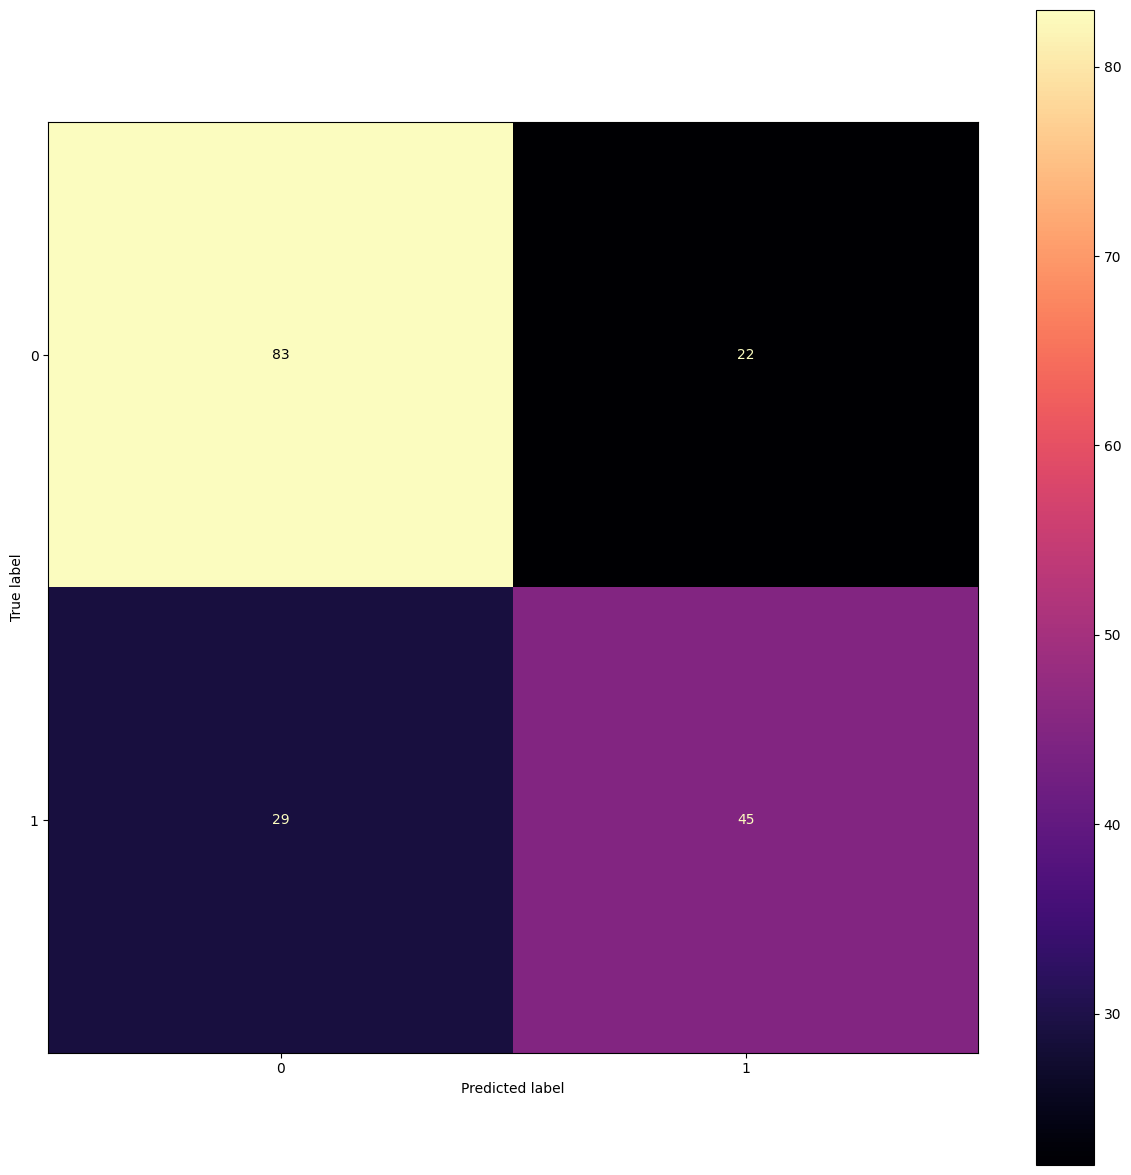

In [10]:
labels_titanic_predict = clf1.predict(titanic_test)

print(f"Score for Prediction: {clf1.score(titanic_test,labels_test)}")
metrics(labels_test, labels_titanic_predict)
cmp = ConfusionMatrixDisplay(confusion_matrix(y_true=labels_test, y_pred= labels_titanic_predict))
fig, ax = plt.subplots(figsize=(15,15))
cmp.plot(ax=ax,cmap='magma')

<h2>cross validation</h2>
<body>from sklearn.model_selection import cross_val_score</body>

<h2>Decision Tree (tree.DecisionTreeClassifier) with the default parameters.</h2>

In [11]:
classifier = DecisionTreeClassifier()
if (os.path.exists('models/DT1_model.pickle')):
    pickle_in = open('models/DT1_model.pickle','rb')
    clf1 = pickle.load(pickle_in)
    print("pickle file used")
else:
    classifier = classifier.fit(titanic_train, labels_train)
    with open('models/DT1_model.pickle','wb') as f:
            pickle.dump(classifier, f)
    pickle_in = open('models/DT1_model.pickle','rb')
    clf1 = pickle.load(pickle_in)



pickle file used


In [12]:
labels_titanic_predict = clf1.predict(titanic_test)

print(f"Score for Prediction: {clf1.score(titanic_test,labels_test)}")
metrics(labels_test, labels_titanic_predict)
cmp = ConfusionMatrixDisplay(confusion_matrix(y_true=labels_test, y_pred= labels_titanic_predict))
cmp.plot(ax=ax,cmap='magma')


Score for Prediction: 0.7653631284916201
Accuracy: 0.7653631284916201
Precision (Weighted): 0.7645567564118183
Recall (Weighted): 0.7653631284916201
F1 Score (Weighted): 0.7648628043277679
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       105
           1       0.72      0.70      0.71        74

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.76      0.77      0.76       179



<h2>Multi-Layered Perceptron (neural network.MLPClassifier) with the default parameters.</h2>

In [13]:
classifier = MLPClassifier()
if (os.path.exists('models/MLP1_model.pickle')):
    pickle_in = open('models/MLP1_model.pickle','rb')
    clf1 = pickle.load(pickle_in)
    print("pickle file used")
else:
    classifier = classifier.fit(titanic_train, labels_train)
    with open('models/MLP1_model.pickle','wb') as f:
            pickle.dump(classifier, f)
    pickle_in = open('models/MLP1_model.pickle','rb')
    clf1 = pickle.load(pickle_in)

pickle file used


In [14]:
print(np.shape(titanic_train))
print(np.shape(labels_train))

(712, 10)
(712,)


Score for Prediction: 0.7541899441340782
Accuracy: 0.7541899441340782
Precision (Weighted): 0.7579639975170701
Recall (Weighted): 0.7541899441340782
F1 Score (Weighted): 0.745673427252854
              precision    recall  f1-score   support

           0       0.74      0.89      0.81       105
           1       0.78      0.57      0.66        74

    accuracy                           0.75       179
   macro avg       0.76      0.73      0.73       179
weighted avg       0.76      0.75      0.75       179



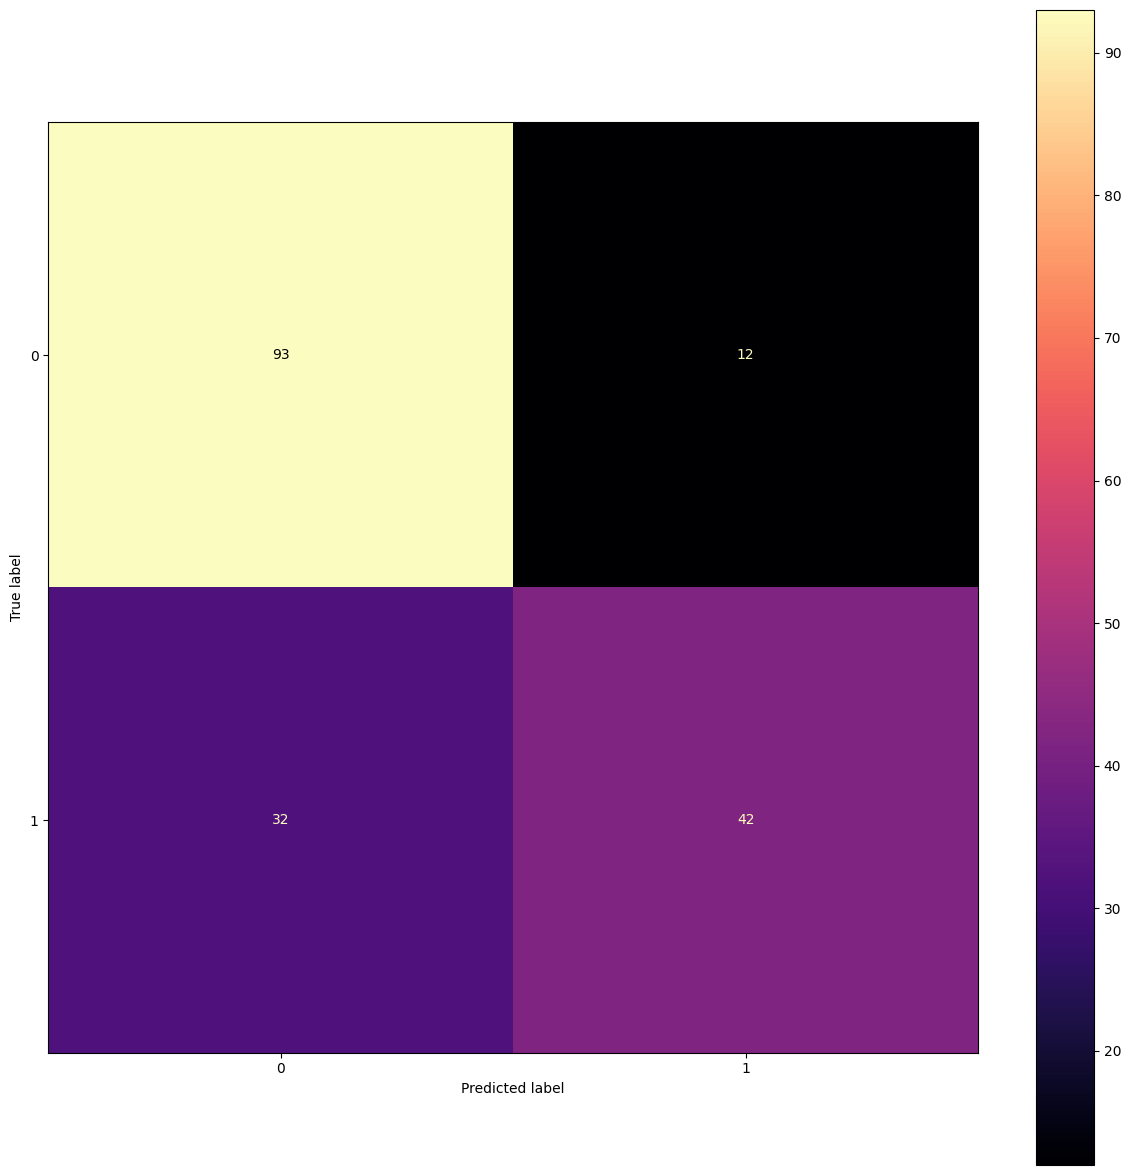

In [15]:
labels_titanic_predict = clf1.predict(titanic_test)

print(f"Score for Prediction: {clf1.score(titanic_test,labels_test)}")
metrics(labels_test, labels_titanic_predict)
cmp = ConfusionMatrixDisplay(confusion_matrix(y_true=labels_test, y_pred= labels_titanic_predict))
fig, ax = plt.subplots(figsize=(15,15))
cmp.plot(ax=ax,cmap='magma')

<h2>Multinomial Naive Bayes Classifier found using GridSearchCV</h2>

input parameter requires a model object

using the following alpha parameters 0.5,0,0.36,1


In [16]:
parameters = {"alpha":(0.5,0,0.36,1)}
clfMNB = MultinomialNB()

classifier = GridSearchCV(estimator=clfMNB, param_grid=parameters,n_jobs=-1, scoring = "recall")

if (os.path.exists('models/MNB1GridCV_model.pickle')):
    pickle_in = open('models/MNB1GridCV_model.pickle','rb')
    clf1 = pickle.load(pickle_in)
    print("pickle file used")
else:
    classifier = classifier.fit(titanic_train, labels_train)
    with open('models/MNB1GridCV_model.pickle','wb') as f:
        pickle.dump(classifier, f)

    pickle_in = open('models/MNB1GridCV_model.pickle','rb')
    clf1 = pickle.load(pickle_in)


pickle file used


Best estimator: MultinomialNB(alpha=0.5), Best Score: 0.5187980433263453
Accuracy: 0.7150837988826816
Precision (Weighted): 0.7123686733928125
Recall (Weighted): 0.7150837988826816
F1 Score (Weighted): 0.7126068335103507
              precision    recall  f1-score   support

           0       0.74      0.79      0.76       105
           1       0.67      0.61      0.64        74

    accuracy                           0.72       179
   macro avg       0.71      0.70      0.70       179
weighted avg       0.71      0.72      0.71       179



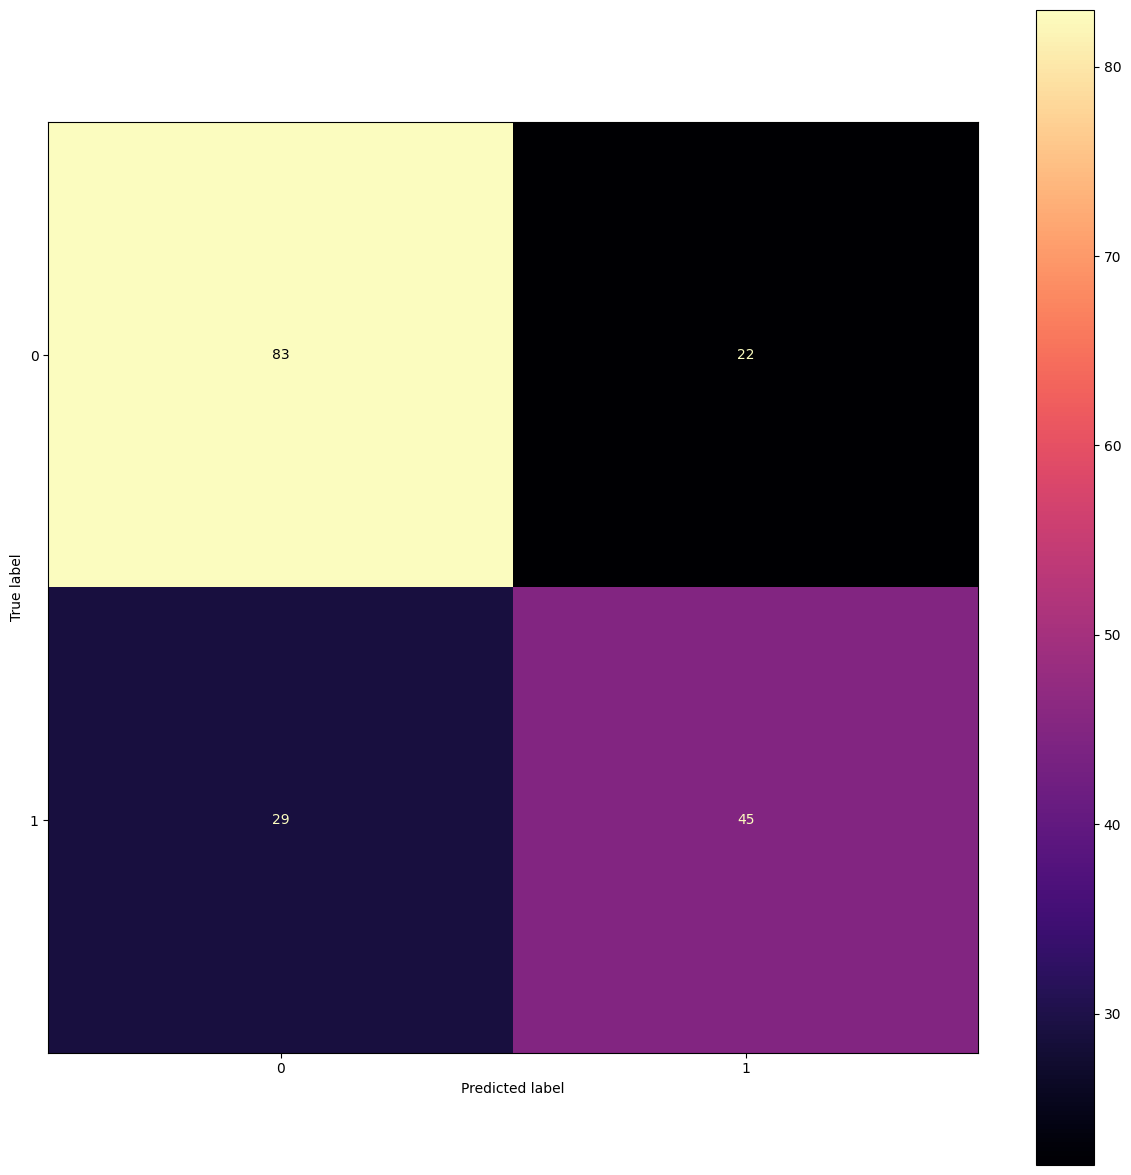

In [17]:
labels_titanic_predict = clf1.predict(titanic_test)

print(f"Best estimator: {clf1.best_estimator_}, Best Score: {clf1.best_score_}")
metrics(labels_test, labels_titanic_predict)
cmp = ConfusionMatrixDisplay(confusion_matrix(y_true=labels_test, y_pred= labels_titanic_predict))
fig, ax = plt.subplots(figsize=(15,15))
cmp.plot(ax=ax,cmap='magma')

<h2>Decision Tree Classifier found using GridSearchCV</h2>

input parameter requires a model object

using the various value for the following parameters: criterion, max_depth, min_samples


In [18]:
parameters = {"criterion":("gini","entropy"),"max_depth":(100,3),"min_samples_split":(12,5,30)}
clfDT = DecisionTreeClassifier()

classifier = GridSearchCV(estimator=clfDT, param_grid=parameters,n_jobs=-1, scoring = "recall")

if (os.path.exists('models/DT1GridCV_model.pickle')):
    pickle_in = open('models/DT1GridCV_model.pickle','rb')
    clf1 = pickle.load(pickle_in)
    print("pickle file used")
else:
    classifier = classifier.fit(titanic_train, labels_train)
    with open('models/DT1GridCV_model.pickle','wb') as f:
        pickle.dump(classifier, f)

    pickle_in = open('models/DT1GridCV_model.pickle','rb')
    clf1 = pickle.load(pickle_in)

pickle file used


Best estimator: DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=30), Best Score: 0.7011180992313069
Accuracy: 0.7988826815642458
Precision (Weighted): 0.7987081005586593
Recall (Weighted): 0.7988826815642458
F1 Score (Weighted): 0.7961666703468987
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       105
           1       0.80      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



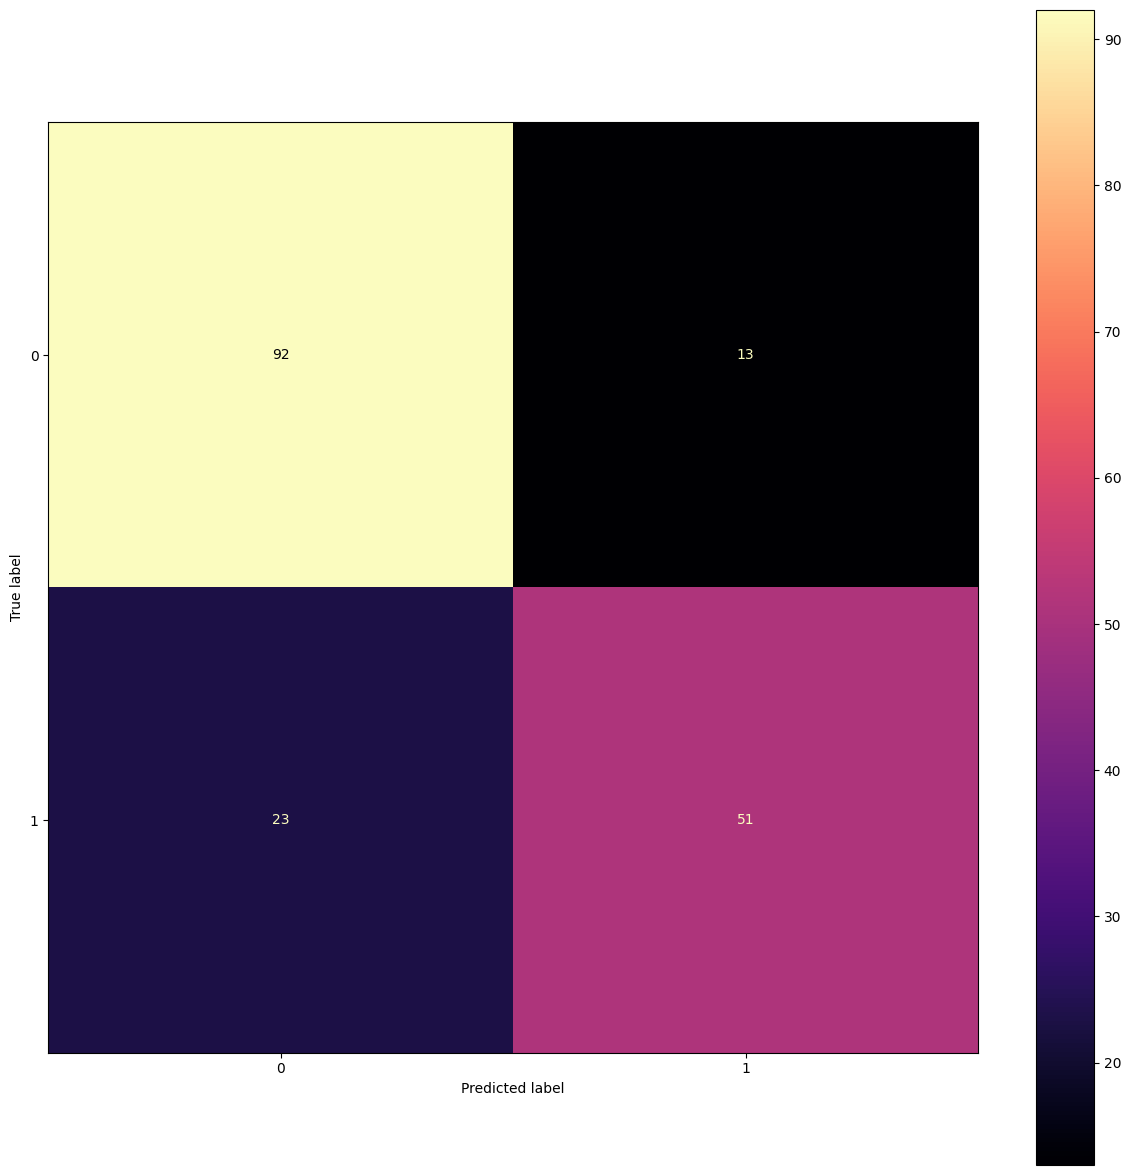

In [19]:
labels_titanic_predict = clf1.predict(titanic_test)

print(f"Best estimator: {clf1.best_estimator_}, Best Score: {clf1.best_score_}")
metrics(labels_test, labels_titanic_predict)
cmp = ConfusionMatrixDisplay(confusion_matrix(y_true=labels_test, y_pred= labels_titanic_predict))
fig, ax = plt.subplots(figsize=(15,15))
cmp.plot(ax=ax,cmap='magma')

<h2>Multi-Layered Perceptron found using GridSearchCV</h2>

input parameter requires a model object

using the various value for the following parameters: activation, architectures, solvers
Hidden layers <a href="https://datascience.stackexchange.com/questions/19768/how-to-implement-pythons-mlpclassifier-with-gridsearchcv">Link</a>


In [20]:
parameters = {"activation":("identity", "logistic", "tanh", "relu"),"hidden_layer_sizes":((11),(121,11),(11,1,3,7)), "solver":("adam","sgd")}
#currently 5 neurons then 5 neurons and 5 neurons then 10 neurons in the hidden layer
clfMLP = MLPClassifier(early_stopping=True, verbose=True, max_iter=50)
classifier = GridSearchCV(estimator=clfMLP, param_grid=parameters, n_jobs=-1, scoring = "recall")
skip=False # when set to False this search will execute

if(not skip):
    if (os.path.exists('models/MLP1GridCV_model.pickle')):
        pickle_in = open('models/MLP1GridCV_model.pickle','rb')
        clf1 = pickle.load(pickle_in)
        print("pickle file used")
    else:
        classifier = classifier.fit(titanic_train.values, labels_train.values)
        with open('models/MLP1GridCV_model.pickle','wb') as f:
            pickle.dump(classifier, f)

        pickle_in = open('models/MLP1GridCV_model.pickle','rb')
        clf1 = pickle.load(pickle_in)

else:
    print("skipped")

Iteration 1, loss = 14.50184244
Validation score: 0.416667
Iteration 2, loss = 14.37988355
Validation score: 0.402778
Iteration 3, loss = 14.26642954
Validation score: 0.402778
Iteration 4, loss = 14.16774385
Validation score: 0.402778
Iteration 5, loss = 14.03902702
Validation score: 0.402778
Iteration 6, loss = 13.85999034
Validation score: 0.402778
Iteration 7, loss = 13.68066355
Validation score: 0.402778
Iteration 8, loss = 13.49481268
Validation score: 0.402778
Iteration 9, loss = 13.34580068
Validation score: 0.402778
Iteration 10, loss = 13.18892752
Validation score: 0.402778
Iteration 11, loss = 13.02607766
Validation score: 0.416667
Iteration 12, loss = 12.85849408
Validation score: 0.430556
Iteration 13, loss = 12.68736824
Validation score: 0.430556
Iteration 14, loss = 12.53260205
Validation score: 0.430556
Iteration 15, loss = 12.40217054
Validation score: 0.430556
Iteration 16, loss = 12.28870420
Validation score: 0.416667
Iteration 17, loss = 12.17699192
Validation score

C:\Users\chanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


Best estimator: MLPClassifier(early_stopping=True, hidden_layer_sizes=11, max_iter=50,
              verbose=True), Best Score: 0.8481481481481481
Accuracy: 0.547486033519553
Precision (Weighted): 0.5578614329364219
Recall (Weighted): 0.547486033519553
F1 Score (Weighted): 0.550632364944783
              precision    recall  f1-score   support

           0       0.63      0.56      0.59       105
           1       0.46      0.53      0.49        74

    accuracy                           0.55       179
   macro avg       0.54      0.54      0.54       179
weighted avg       0.56      0.55      0.55       179



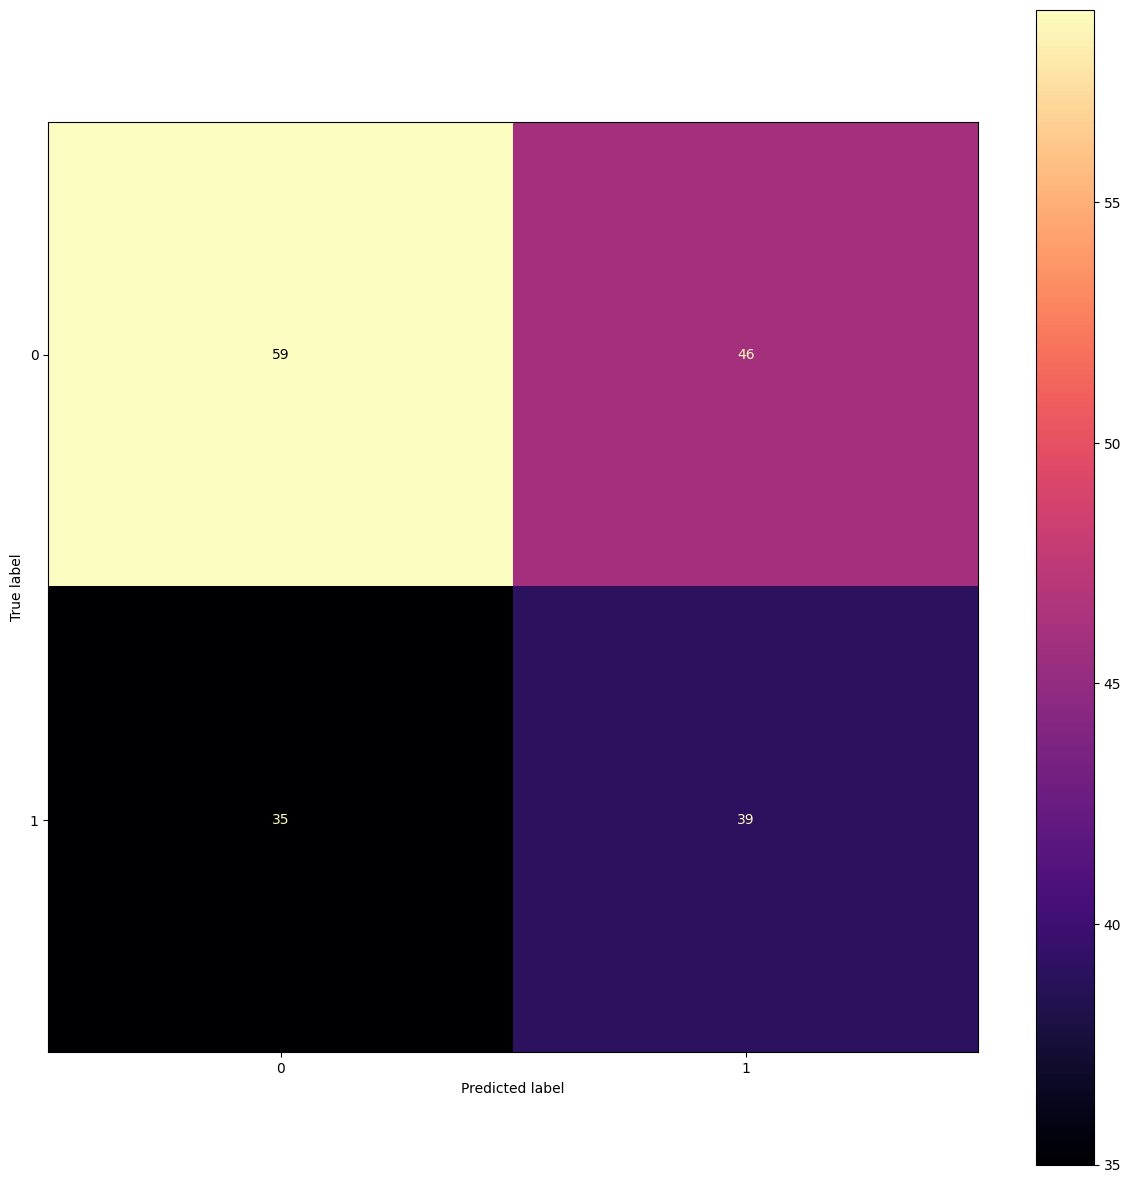

In [22]:
if (os.path.exists('models/MLP1GridCV_model.pickle') and not skip):
    labels_titanic_predict = clf1.predict(titanic_test)

    print(f"Best estimator: {clf1.best_estimator_}, Best Score: {clf1.best_score_}")
    metrics(labels_test, labels_titanic_predict)
    cmp = ConfusionMatrixDisplay(confusion_matrix(y_true=labels_test, y_pred= labels_titanic_predict))
    fig, ax = plt.subplots(figsize=(15,15))
    cmp.plot(ax=ax,cmap='magma')
else:
    print("skipped")